Customer Sales_Linear Regression 

In [ ]:
import numpy as np
import pandas as pd

In [16]:
df=pd.read_csv(r"/home/intellect/Documents/Data_Scientist/Exam_Score_Prediction.csv")
df.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


In [17]:
df.tail()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
19995,19997,18,other,bba,6.50,71.3,yes,5.0,good,self-study,low,easy,86.5
19996,19998,18,male,b.com,3.71,41.6,no,5.9,average,coaching,medium,moderate,60.9
19997,19999,19,other,diploma,7.88,68.2,yes,4.6,poor,group study,low,easy,64.5
19998,20000,19,male,bba,4.60,76.3,no,6.1,good,self-study,medium,moderate,79.0
19999,20001,20,male,b.sc,7.50,47.9,yes,7.5,poor,coaching,medium,moderate,71.0


In [18]:
df.shape

(20000, 13)

In [19]:
df.describe()

,student_id,age,study_hours,class_attendance,sleep_hours,exam_score
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,10000.504600,20.473300,4.007604,70.017365,7.00856,62.513225
std,5773.654959,2.284458,2.308313,17.282262,1.73209,18.908491
min,1.000000,17.000000,0.080000,40.600000,4.10000,19.599000
25%,5000.750000,18.000000,2.000000,55.100000,5.50000,48.800000
50%,10000.500000,20.000000,4.040000,69.900000,7.00000,62.600000
75%,15000.250000,22.000000,6.000000,85.000000,8.50000,76.300000
max,20001.000000,24.000000,7.910000,99.400000,9.90000,100.000000


In [20]:
print("Missing_values \n",df.isnull().sum())

Missing_values 
 student_id          0
age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64


In [21]:
df.columns

Index(['student_id', 'age', 'gender', 'course', 'study_hours',
       'class_attendance', 'internet_access', 'sleep_hours', 'sleep_quality',
       'study_method', 'facility_rating', 'exam_difficulty', 'exam_score'],
      dtype='object')

In [11]:
!pip install seaborn

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

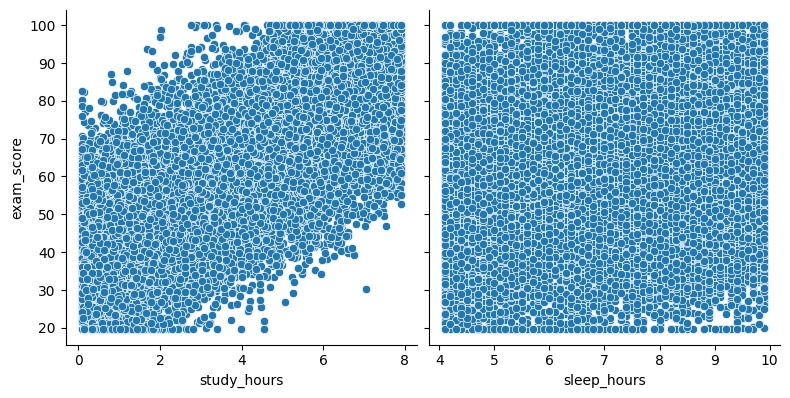

In [40]:
sns.pairplot(df, x_vars=['study_hours','sleep_hours'], y_vars='exam_score',height=4, aspect=1, kind='scatter')
plt.show()

In [43]:
df=df.drop("internet_access",axis=1)


In [44]:
df.head()

,student_id,age,study_hours,class_attendance,sleep_hours,exam_score
0,1,17,2.78,92.9,7.4,58.9
1,2,23,3.37,64.8,4.6,54.8
2,3,22,7.88,76.8,8.5,90.3
3,4,20,0.67,48.4,5.8,29.7
4,5,20,0.89,71.6,9.8,43.7


In [45]:
print(df.corr())

                  student_id       age  study_hours  class_attendance  \
student_id          1.000000 -0.002574     0.002116          0.001128   
age                -0.002574  1.000000     0.002955          0.008449   
study_hours         0.002116  0.002955     1.000000         -0.001645   
class_attendance    0.001128  0.008449    -0.001645          1.000000   
sleep_hours        -0.000560 -0.000385    -0.004533          0.007187   
exam_score          0.003269  0.006522     0.717788          0.308850   

                  sleep_hours  exam_score  
student_id          -0.000560    0.003269  
age                 -0.000385    0.006522  
study_hours         -0.004533    0.717788  
class_attendance     0.007187    0.308850  
sleep_hours          1.000000    0.133222  
exam_score           0.133222    1.000000  


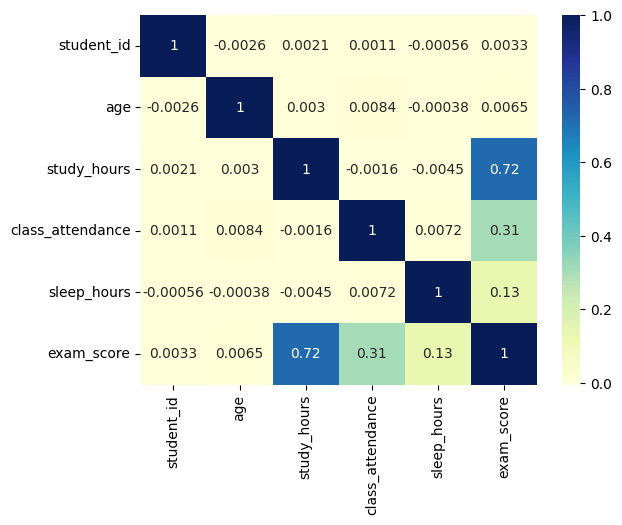

In [47]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [50]:
X=df['study_hours']
y=df["exam_score"]

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)

In [52]:
X_train.shape   #2D --(n_samples, n_features)

(14000,)